## Load Dataset

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

DATA_PATH = "../data/health_markers_dataset.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV,Condition
0,74.98,4.0,126.55,65.35,109.67,58.87,155.56,12.49,92.83,Fit
1,101.48,4.0,106.81,69.30,148.84,21.20,448.21,14.70,90.16,High_Cholesterol
2,118.84,4.0,103.59,78.59,84.47,44.81,106.55,15.07,92.21,Fit
3,117.32,4.0,92.98,76.08,116.48,45.43,126.72,14.13,88.43,Fit
4,104.48,4.0,178.27,99.09,97.37,40.44,159.49,15.22,83.23,Hypertension


## Initial Data Overview

In [136]:
print("\nShape of the DataFrame:",df.shape)


Shape of the DataFrame: (25000, 10)


In [137]:
print("\nData types and non-null counts:")
print(df.info())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Blood_glucose  24838 non-null  float64
 1   HbA1C          24838 non-null  float64
 2   Systolic_BP    24838 non-null  float64
 3   Diastolic_BP   24838 non-null  float64
 4   LDL            24838 non-null  float64
 5   HDL            24838 non-null  float64
 6   Triglycerides  24838 non-null  float64
 7   Haemoglobin    24838 non-null  float64
 8   MCV            24838 non-null  float64
 9   Condition      25000 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.9+ MB
None


In [144]:
df.describe(include='all')

,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV,Condition
count,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,24838.000000,25000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fit
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18000
mean,102.764531,5.509865,112.784860,72.122061,100.342001,48.910538,126.284489,13.809394,87.346819,NaN
std,26.638242,1.089084,16.397005,9.621925,34.707913,7.352030,65.675811,1.535363,5.759370,NaN
min,70.010000,4.000000,90.000000,60.000000,50.000000,20.050000,50.010000,6.000000,60.000000,NaN
25%,84.200000,4.680000,100.600000,65.420000,73.670000,44.080000,83.770000,12.890000,83.520000,NaN
50%,98.360000,5.360000,111.100000,70.750000,97.440000,49.430000,117.760000,13.930000,87.700000,NaN
75%,111.800000,6.050000,121.510000,76.100000,121.120000,54.770000,152.000000,14.960000,91.830000,NaN


In [145]:
print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
Blood_glucose    162
HbA1C            162
Systolic_BP      162
Diastolic_BP     162
LDL              162
HDL              162
Triglycerides    162
Haemoglobin      162
MCV              162
Condition          0
dtype: int64



- The dataset contains `25,000` rows and `10 columns`, with `9 columns` capturing medical test values and `1 column` representing the final `health condition` and remaining all are numeric columns.

- Except Condition remaining all the medical parameters have a small number of missing values` (162 records)`, but the condition label is complete for all individuals.

- Overall, the data is well organized and easy to work with, with only basic cleaning needed before moving on to analysis.


In [111]:
df['Condition'].value_counts()

Condition
Fit                 18000
Diabetes             3052
Hypertension         1757
High_Cholesterol     1323
Anemia                868
Name: count, dtype: int64

## Duplicate Detection and Removal


In [112]:
print("\nNumber of duplicate rows:",df.duplicated().sum())
##df.drop_duplicates(inplace=True)
## print("\nNumber of duplicate rows after removal:",df.duplicated().sum())


Number of duplicate rows: 0


- No duplicate rows were found in the dataset, indicating good data integrity in terms of unique records.

## Missing Value Imputation

In [146]:
print("Missing values before imputation:")
print(df.isnull().sum())
print("Total No of missing values:", df.isnull().sum().sum())  # Total missing values
print("Percentage of missing values:", (df.isnull().sum().sum()/len(df))*100)  # Percentage of missing values

Missing values before imputation:
Blood_glucose    162
HbA1C            162
Systolic_BP      162
Diastolic_BP     162
LDL              162
HDL              162
Triglycerides    162
Haemoglobin      162
MCV              162
Condition          0
dtype: int64
Total No of missing values: 1458
Percentage of missing values: 5.832


In [114]:
##cnt = df.isnull().sum(axis=1)
##df[cnt>2]
print(df['Blood_glucose'].median())
df.groupby('Condition')['Blood_glucose'].median()

98.36


Condition
Anemia               94.71
Diabetes            161.09
Fit                  94.79
High_Cholesterol     93.59
Hypertension         94.72
Name: Blood_glucose, dtype: float64

In [115]:
print("Overall median:", df['Blood_glucose'].median())
print("Group by median based on Health condition:", df.groupby(['Condition'])['Blood_glucose'].median())

Overall median: 98.36
Group by median based on Health condition: Condition
Anemia               94.71
Diabetes            161.09
Fit                  94.79
High_Cholesterol     93.59
Hypertension         94.72
Name: Blood_glucose, dtype: float64


In [148]:
## We are repalcing the medians inplace of missing values based on the health condition
num_col = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
num_col


for col in num_col:
    global_median = df[col].median()

    df[col] = (df.groupby('Condition')[col]
    .transform(lambda x: x.fillna(x.median()))
    .fillna(global_median))


In [149]:
print("Missing values After imputation:")
print(df.isnull().sum())

Missing values After imputation:
Blood_glucose    0
HbA1C            0
Systolic_BP      0
Diastolic_BP     0
LDL              0
HDL              0
Triglycerides    0
Haemoglobin      0
MCV              0
Condition        0
dtype: int64


- Missing values in numerical biomarkers were handled using `condition-wise median imputation`, ensuring replacements remained clinically consistent within each health condition.

- The **median** was chosen over the mean due to its robustness to outliers and skewed distributions common in medical test data.

- A global median fallback was applied where condition-level medians could not be computed, ensuring complete data with no residual missing values.

- This approach preserves disease-specific patterns, avoids distortion of biomarker distributions, and supports stable downstream EDA and machine learning models.

## Outlier Identification

#### Normal Ranges for each Biomarker with relavance to health condition

| Biomarker | Normal | Borderline / Pre-condition | Disease Range | Reference link
|---------|--------|----------------------------|---------------|-----------------------------|
| **Blood Glucose (Fasting)** (mg/dL) | 70 – 99 | 100 – 125 (Prediabetes) | ≥ 126 (Diabetes) | https://medlineplus.gov/ency/article/003482.htm |
| **HbA1C** (%) | < 5.7 | 5.7 – 6.4 (Prediabetes) | ≥ 6.5 (Diabetes) | https://medlineplus.gov/a1c.html |
| **Systolic BP** (mmHg) | < 120 | 120 – 129 (Elevated) | ≥ 130 (Hypertension)| https://medlineplus.gov/howtopreventhighbloodpressure.html |
| **Diastolic BP** (mmHg) | < 80 | 80 – 89 | ≥ 90 (Hypertension) | https://medlineplus.gov/howtopreventhighbloodpressure.html |
| **LDL Cholesterol** (mg/dL) | < 100 | 130 – 159 | ≥ 160 (High Cholesterol) | https://medlineplus.gov/ldlthebadcholesterol.html |
| **HDL Cholesterol** (mg/dL) | ≥ 60 (Protective) | 40 – 59 | < 40 (Cholesterol Risk) | https://medlineplus.gov/ldlthebadcholesterol.html |
| **Triglycerides** (mg/dL) | < 150 | 150 – 199 | ≥ 200 (High Cholesterol) | https://medlineplus.gov/triglycerides.html |
| **Haemoglobin – Men** (g/dL) | ≥ 13.5 | 11.0 – 13.4 | < 13.5 (Anemia) | https://www.nhlbi.nih.gov/health/blood-tests |
| **Haemoglobin – Women** (g/dL) | ≥ 12.0 | 10.0 – 11.9 | < 12.0 (Anemia) | https://www.nhlbi.nih.gov/health/blood-tests |
| **MCV** (fL) | 80 – 100 | — | < 80 (Microcytic) / > 100 (Macrocytic) | https://www.nhlbi.nih.gov/health/blood-tests |


In [118]:
outlier_summary = {}

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

# Optional: view outlier counts
outlier_summary


{'Blood_glucose': 1828,
 'HbA1C': 1108,
 'Systolic_BP': 967,
 'Diastolic_BP': 1609,
 'LDL': 730,
 'HDL': 524,
 'Triglycerides': 1023,
 'Haemoglobin': 645,
 'MCV': 508}

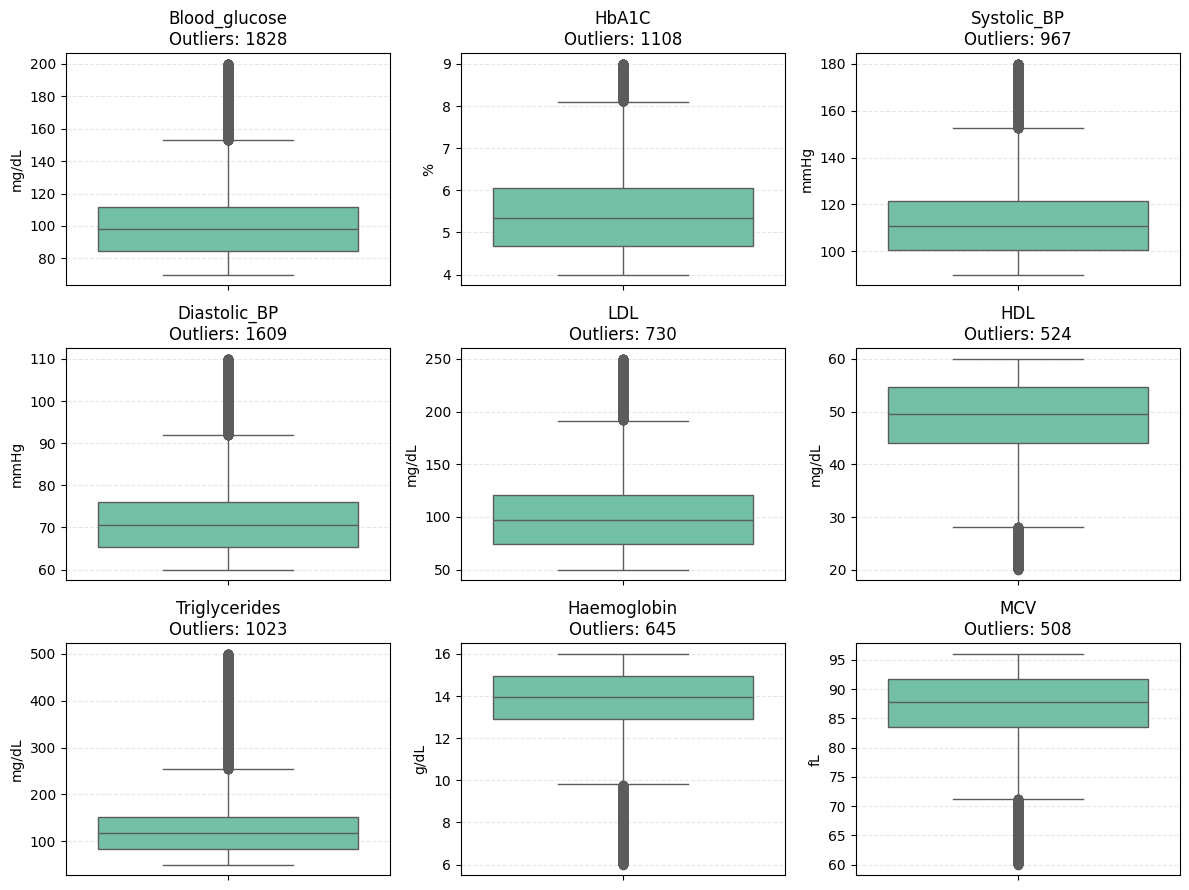

In [119]:
n_cols = 3
n_rows = 3

plt.figure(figsize=(n_cols * 4, n_rows * 3))

units = {
    'Blood_glucose': 'mg/dL',
    'HbA1c': '%',
    'Systolic_BP': 'mmHg',
    'Diastolic_BP': 'mmHg',
    'LDL': 'mg/dL',
    'HDL': 'mg/dL',
    'Triglycerides': 'mg/dL',
    'Haemoglobin': 'g/dL',
    'MCV': 'fL',
}

for i, (col, unit) in enumerate(zip(num_cols, units.values()), 1):
    plt.subplot(n_rows, n_cols, i)

    sns.boxplot(y=df[col], color='mediumaquamarine')

    plt.title(f"{col}\nOutliers: {outlier_summary[col]}")
    plt.ylabel(unit)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Indicator-wise Outlier Summary
*   Outliers were quantified using the **IQR method** across numerical features:
- `Blood Glucose`: **1810 outliers**  
  High-end outliers fall within the diabetic range, representing clinically valid rather than data anomalies.

- `HbA1c`: **1108 outliers**  
  Elevated outliers indicate poor long-term diabetes and are expected in populations with diabetes or prediabetes.

- `Systolic Blood Pressure`: **957 outliers**  
  Upper outliers correspond to stage 1–2 hypertension, reflecting meaningful cardiovascular risk.

- `Diastolic Blood Pressure`: **1594 outliers**  
  Outliers above normal thresholds indicate diastolic hypertension and natural blood pressure variability.

- `LDL`: **724 outliers**  
  High LDL outliers align with clinically defined high and very high cardiovascular risk categories.

- `HDL`: **520 outliers**  
  Lower-end outliers indicate reduced protective cholesterol levels, a known cardiovascular risk factor.

- `Triglycerides`: **1022 outliers**  
  Extreme upper values reflect metabolic dysregulation commonly observed in lipid profiles, which also risk of having Cholestrol.

- `Haemoglobin`: **645 outliers**  
  Low-value outliers correspond to anemia cases and are clinically meaningful.

- `MCV`: **500 outliers**  
  Outliers on Lower end represent macrocytic condition which indicates a type of anemia.

---

### Overall Summary of Ouliers

Across all nine indicators, observed outliers fall within clinically recognized disease ranges and represent genuine health conditions rather than data quality issues. These values were retained during EDA to preserve real-world variability and ensure accurate downstream health risk analysis.


## Exploratory Data Analysis (EDA)


### Univariate Analysis

In [120]:
print("Descriptive statistics for numerical columns:")
df.describe()

Descriptive statistics for numerical columns:


,Blood_glucose,HbA1C,Systolic_BP,Diastolic_BP,LDL,HDL,Triglycerides,Haemoglobin,MCV
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,102.712457,5.507831,112.764145,72.108409,100.308017,48.917669,126.205873,13.810657,87.351060
std,26.559626,1.085843,16.345810,9.592189,34.597847,7.328703,65.469946,1.530461,5.740919
min,70.010000,4.000000,90.000000,60.000000,50.000000,20.050000,50.010000,6.000000,60.000000
25%,84.277500,4.680000,100.680000,65.450000,73.860000,44.110000,83.965000,12.900000,83.550000
50%,98.170000,5.350000,110.970000,70.670000,97.190000,49.490000,117.380000,13.940000,87.760000
75%,111.690000,6.050000,121.430000,76.060000,120.970000,54.740000,151.790000,14.960000,91.800000
max,199.950000,9.000000,180.000000,109.990000,250.000000,60.000000,499.800000,16.000000,96.000000


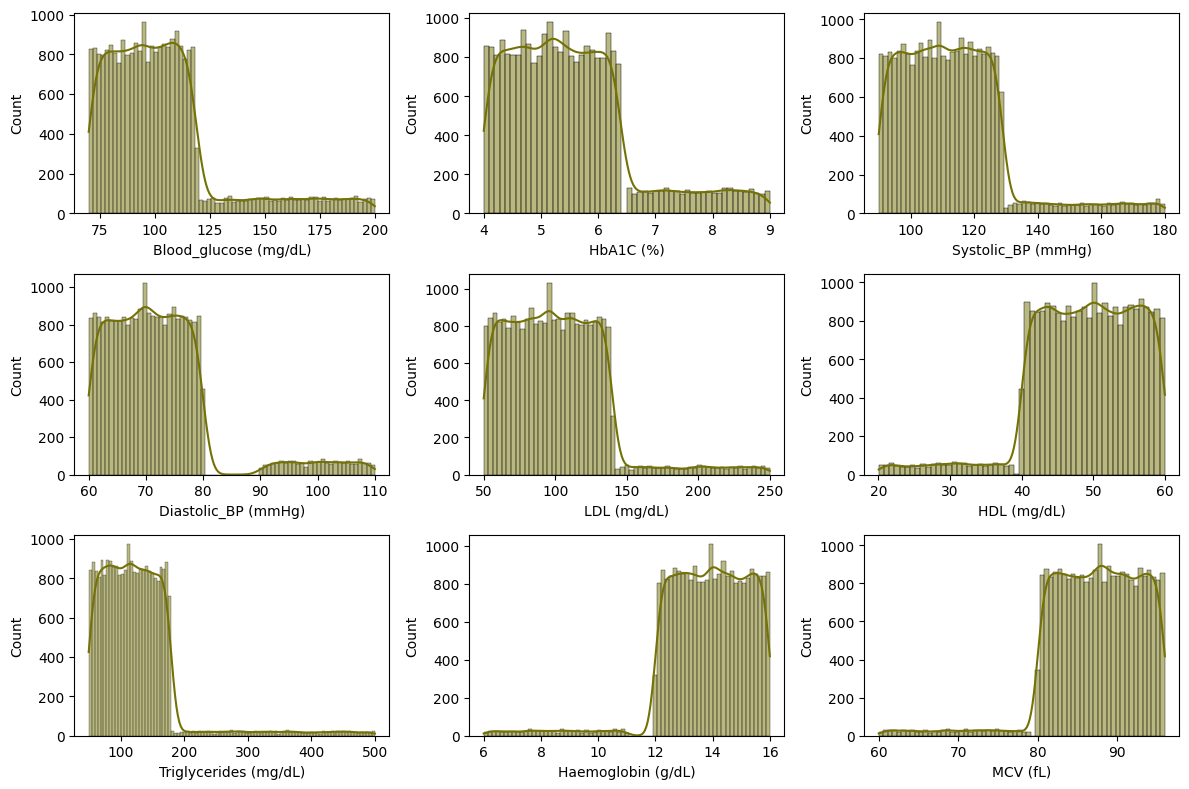

In [121]:
plt.figure(figsize=(12, 8))

for i, (col, unit) in enumerate(zip(num_cols, units.values()), 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col],kde=True, color="#747204")
    plt.xlabel(f"{col} ({unit})")

plt.tight_layout()
plt.show()

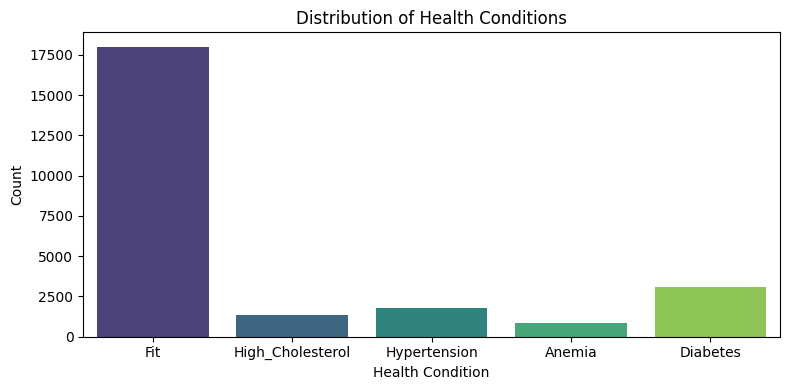

In [122]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Condition', hue='Condition', palette='viridis', legend=False)
plt.title('Distribution of Health Conditions')
plt.xlabel('Health Condition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

#### Insights from Univariate Analysis

- Most biomarkers show **right-skewed distributions with clinically meaningful outliers**.
- There is clear **distributional separation between normal and abnormal clinical ranges** for blood glucose, HbA1c, blood pressure, and lipid markers, indicating strong individual predictive potential.
- **Hemoglobin and MCV** exhibit distinct lower-end variations, effectively supporting the identification of anemia-related conditions.
- The target variable (`Condition`) is **highly imbalanced**, with the *Fit* category dominating the dataset, which has important implications for model selection and evaluation metrics.
- Descriptive statistics (mean, median, quartiles, and maxima) reinforce that the dataset reflects **real-world clinical variability** rather than random noise.

### Bivariate Analysis

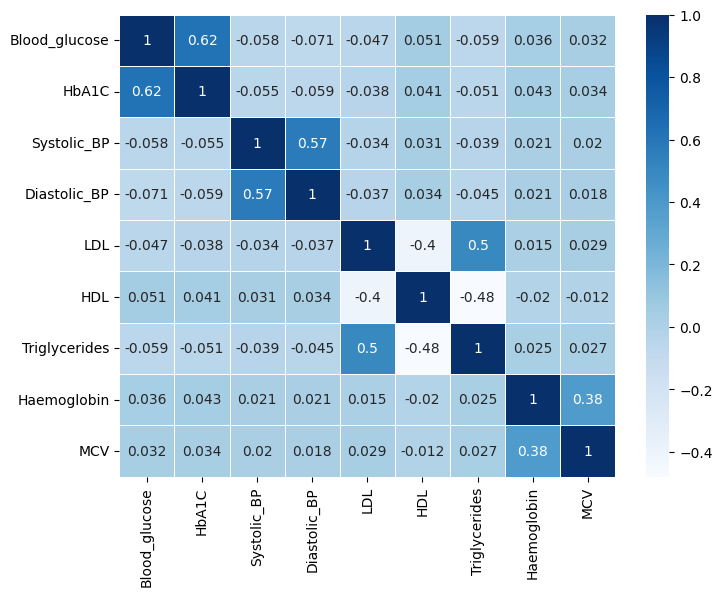

In [123]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Blues',linewidths=0.5)
plt.show()

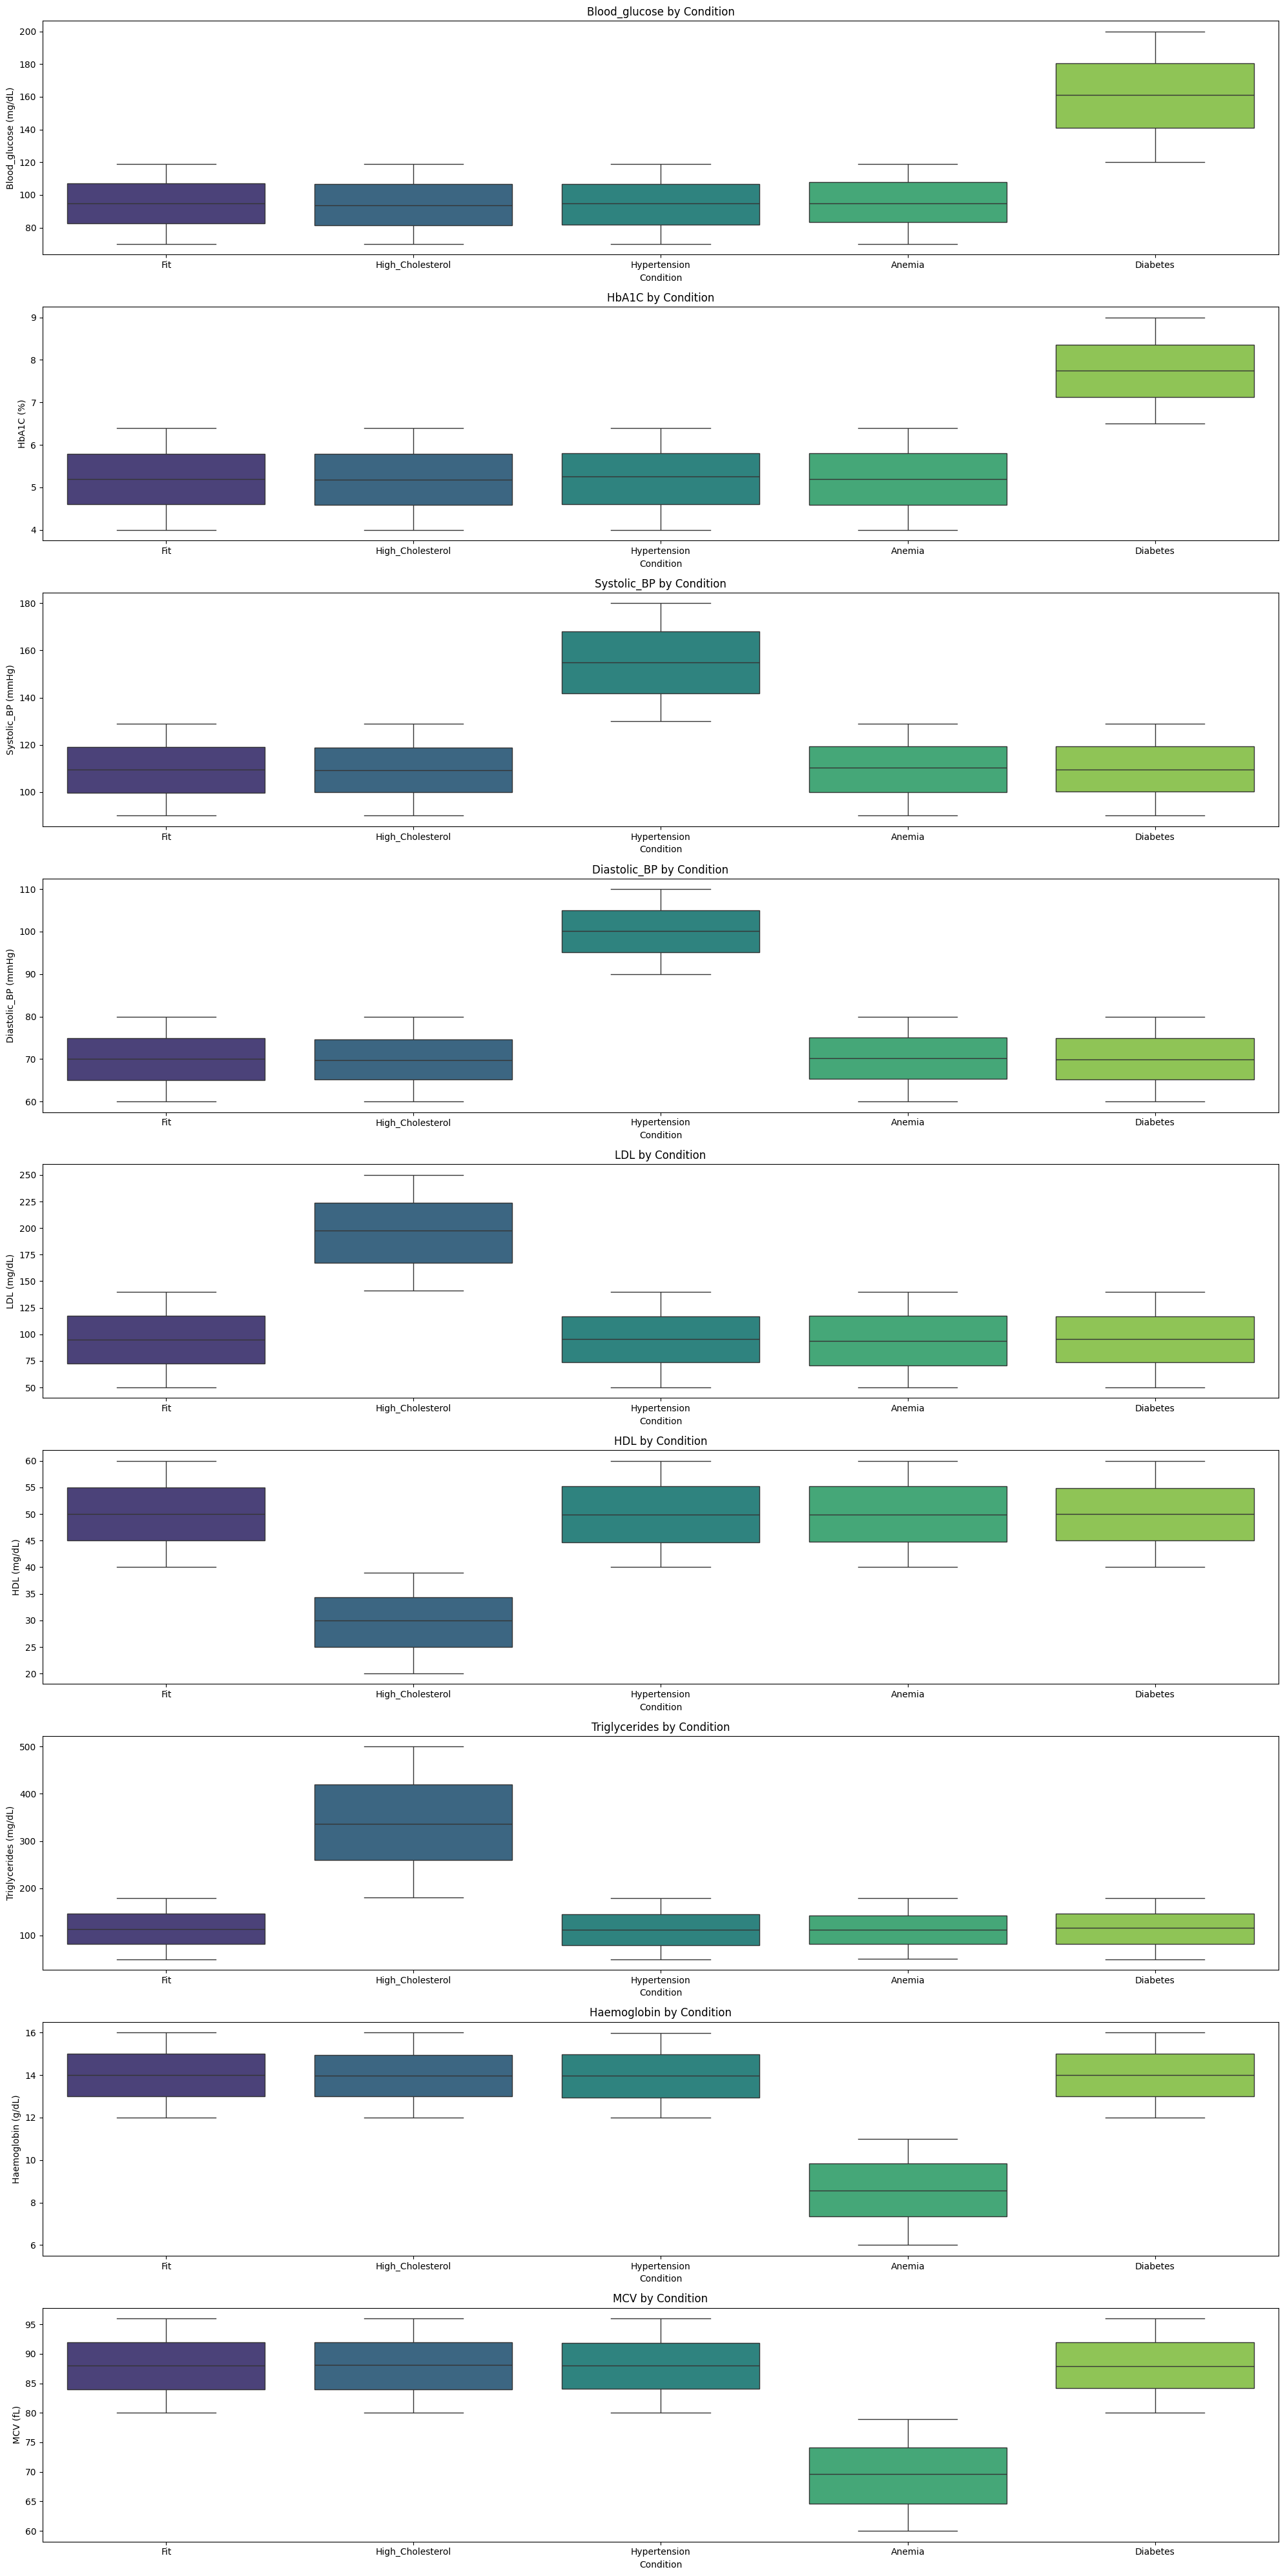

In [124]:
plt.figure(figsize=(20, 40))
for i, (col,unit) in enumerate(zip(num_cols,units.values()),1):
    plt.subplot(len(num_cols), 1, i) # Arrange plots vertically
    sns.boxplot(data=df, x='Condition', y=col, hue='Condition', palette='viridis', legend=False)
    plt.title(f'{col} by Condition')
    plt.xlabel('Condition')
    plt.ylabel(f"{col} ({unit})")
plt.tight_layout()
plt.show()

## Insights from Bivariate Analysis

- **Strong clinically meaningful correlations are observed between related biomarkers**:
  - Blood Glucose and HbA1c show a strong positive correlation (~0.62), validating HbA1c as a long-term glycemic indicator.
  - Systolic BP and Diastolic BP are moderately correlated (~0.57), reflecting physiological blood pressure dynamics.
  - LDL and Triglycerides are positively correlated (~0.50), while HDL shows a negative correlation with both LDL(-0.4) and Triglycerides(-0.48), aligning with established cardiovascular risk profiles.
  - Hemoglobin and MCV demonstrate a moderate positive correlation (~0.38) and jointly differentiate anemia from other conditions.

- **Clear condition-wise separation is visible across multiple biomarkers**:
  - Diabetes shows significantly higher Blood Glucose and HbA1c.
  - Hypertension exhibits distinctly elevated Systolic and Diastolic BP.
  - High Cholesterol is characterized by higher LDL and Triglycerides with lower HDL.
  - Anemia shows markedly lower Hemoglobin and MCV values.

- **Low cross-domain correlations reduce multicollinearity risk**:
  - Minimal correlation between glycemic, lipid, blood pressure, and hematology markers suggests that features contribute **independent predictive information**, favoring robust multi-class ML modeling.


### Multivariate Analysis


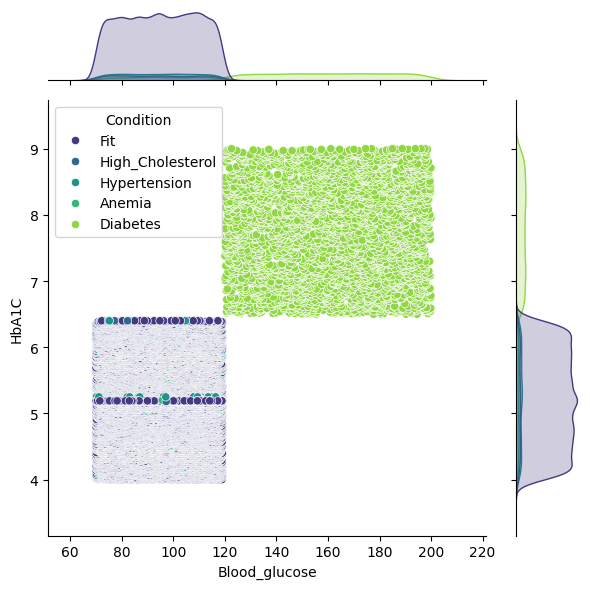

In [ ]:
## Analysis of Blood_glucose and HbA1C relationship for different conditions
sns.jointplot(x=df['Blood_glucose'],y=df['HbA1C'], hue=df['Condition'], palette='viridis',height=6)
plt.tight_layout()
plt.show()

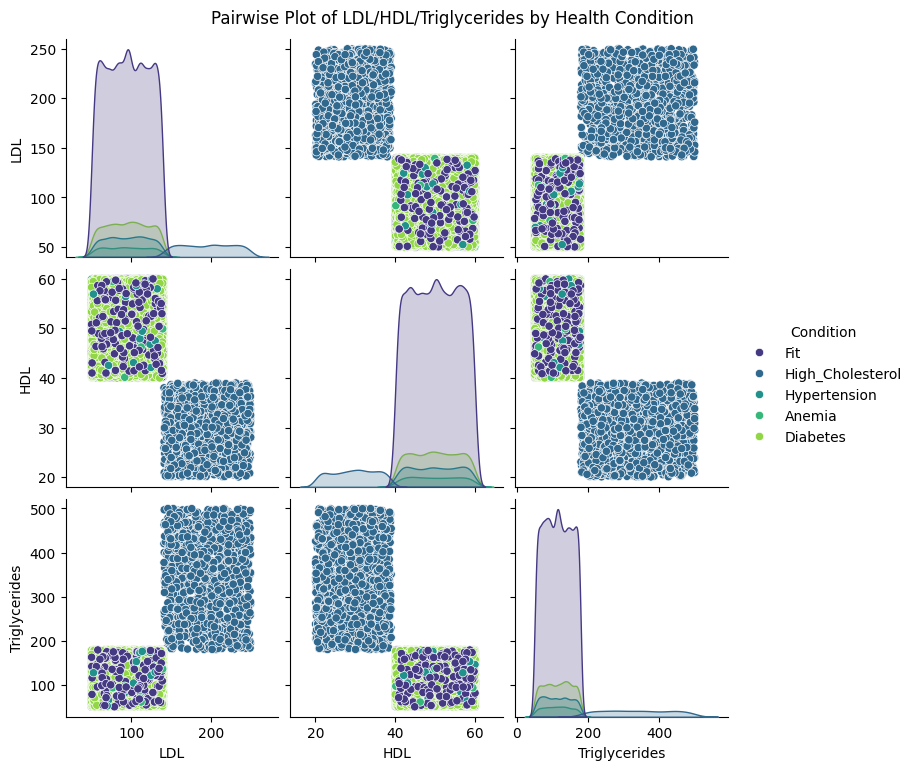

In [ ]:
## Analusis of LDL, HDL and Triglycerides relationship for different conditions
selected_features = ['LDL','HDL','Triglycerides', 'Condition']
df_sub1 = df[selected_features].copy()

sns.pairplot(df_sub1, hue='Condition', palette='viridis', diag_kind='kde')
plt.suptitle('Pairwise Plot of LDL/HDL/Triglycerides by Health Condition', y=1.02) # Adjust suptitle position
plt.show()

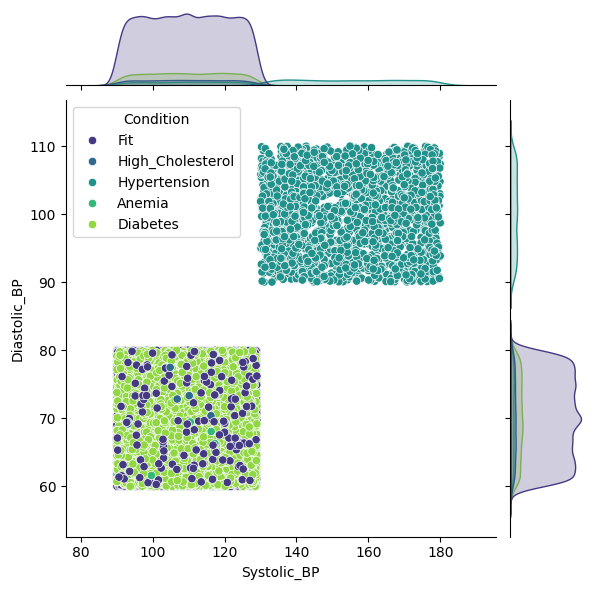

In [ ]:
## Analysis Systolic_BP and Diastolic_BP relationship for different conditions
sns.jointplot(x=df['Systolic_BP'],y=df['Diastolic_BP'], hue=df['Condition'], palette='viridisy',height=6)
plt.show()

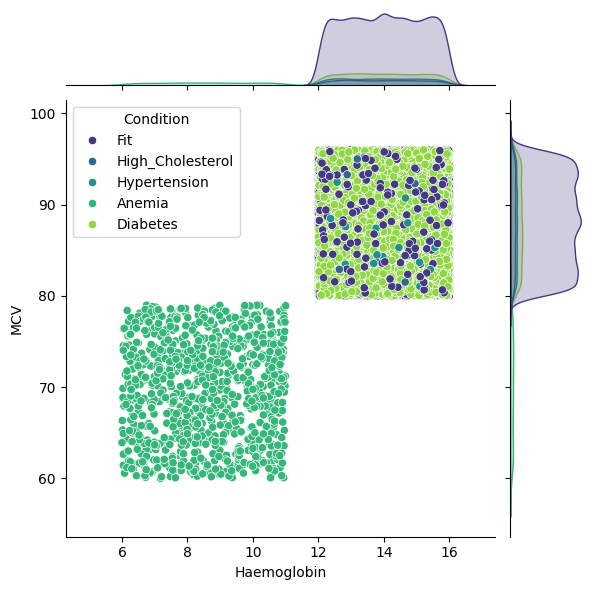

In [128]:
sns.jointplot(x=df['Haemoglobin'],y=df['MCV'], hue=df['Condition'], palette='viridis',height=6)
plt.show()

### Insights from Multivariate Analysis

- **Strong multivariate separation is observed across disease-specific biomarker clusters**, with diabetes clearly isolated by jointly elevated Blood Glucose and HbA1c, while other conditions remain concentrated within normal glycemic ranges.
- **Cardiovascular conditions exhibit distinct lipid interaction patterns**, where High Cholesterol cases are characterized by simultaneously high LDL and Triglycerides with suppressed HDL, forming a well-defined multivariate cluster.
- **Hypertension demonstrates a clear joint elevation of Systolic and Diastolic Blood Pressure**, with minimal overlap against non-hypertensive conditions, indicating strong discriminative power of BP features in combination.
- **Hematological markers jointly differentiate anemia**, as low Hemoglobin coupled with reduced MCV forms a distinct cluster, separating anemia from metabolic and cardiovascular conditions.
- **Limited cross-domain interaction between biomarker groups** (glycemic, lipid, blood pressure, hematology) suggests low multicollinearity and supports the effectiveness of multi-feature models for robust multi-class classification.


## Hypothesis Testing

#### Hypothesis Test1
**Do Different Biomarker levels differ across the 5 health conditions?**

 - should be highest in corresponding health condition, lowest in Fit, and intermediate elsewhere.
 - Test: One-Way ANOVA

**Hypotheses**

*H₀: Mean for selected Biomarker is equal across all conditions*

*H₁: At least one condition has a different mean*


In [130]:
for col in num_cols:
    groups = [
        df[df['Condition'] == cond][col].dropna()
        for cond in df['Condition'].unique()
    ]
    f_stat, p_val = stats.f_oneway(*groups)
    alpha=0.05
    if p_val < alpha:
        print(f"Conclusion: f_stat {f_stat},  p-value ({p_val:.4f}) < {alpha}. "
          f"Reject H₀ — mean {col} differs across Condition groups.")
    else:
        print(f"Conclusion: p-value ({p_val:.4f}) ≥ {alpha}. "
          f"Fail to reject H₀ — no significant difference in mean {col} across groups.")

Conclusion: f_stat 12209.476750871703,  p-value (0.0000) < 0.05. Reject H₀ — mean Blood_glucose differs across Condition groups.
Conclusion: f_stat 9046.660343442241,  p-value (0.0000) < 0.05. Reject H₀ — mean HbA1C differs across Condition groups.
Conclusion: f_stat 6393.186392971775,  p-value (0.0000) < 0.05. Reject H₀ — mean Systolic_BP differs across Condition groups.
Conclusion: f_stat 11266.415628545848,  p-value (0.0000) < 0.05. Reject H₀ — mean Diastolic_BP differs across Condition groups.
Conclusion: f_stat 4650.664308588026,  p-value (0.0000) < 0.05. Reject H₀ — mean LDL differs across Condition groups.
Conclusion: f_stat 3906.685076602837,  p-value (0.0000) < 0.05. Reject H₀ — mean HDL differs across Condition groups.
Conclusion: f_stat 8979.4801822138,  p-value (0.0000) < 0.05. Reject H₀ — mean Triglycerides differs across Condition groups.
Conclusion: f_stat 4588.396060840559,  p-value (0.0000) < 0.05. Reject H₀ — mean Haemoglobin differs across Condition groups.
Conclusio

In [151]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for col in num_cols:
    tukey = pairwise_tukeyhsd(
        endog=df[col],
        groups=df['Condition'],
        alpha=0.05
    )
    print(f"\nPost-hoc results for {col}")
    print(tukey)



Post-hoc results for Blood_glucose
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
     group1           group2      meandiff p-adj   lower    upper   reject
--------------------------------------------------------------------------
          Anemia         Diabetes  65.4088    0.0  63.7871  67.0306   True
          Anemia              Fit  -0.5255 0.8651  -1.9906   0.9396  False
          Anemia High_Cholesterol  -1.1755 0.4085   -3.017    0.666  False
          Anemia     Hypertension  -0.8421 0.6829  -2.5912    0.907  False
        Diabetes              Fit -65.9343    0.0 -66.7597  -65.109   True
        Diabetes High_Cholesterol -66.5843    0.0 -67.9721 -65.1966   True
        Diabetes     Hypertension -66.2509    0.0 -67.5135 -64.9884   True
             Fit High_Cholesterol    -0.65 0.5778  -1.8509   0.5509  False
             Fit     Hypertension  -0.3166 0.9247  -1.3703   0.7372  False
High_Cholesterol     Hypertension   0.3334 0.9762  -1.2012   1.8

### Insights from One-Way ANOVA and Tukey HSD Analysis

#### ANOVA Findings
- One-way ANOVA results show **statistically significant differences (p < 0.05)** in the mean values of **all nine biomarkers** across the five health conditions.
- Extremely large F-statistics indicate **strong between-condition variability**, confirming that biomarker distributions are meaningfully different by health condition.
- These results validate the dataset’s suitability for **multi-class disease classification**.

---

#### Condition-Specific Insights from Tukey HSD (Post-hoc)

**1. Diabetes**
- **Blood Glucose and HbA1c** are **significantly higher in Diabetes compared to all other conditions**, with no overlap among non-diabetic groups.
- This confirms these two biomarkers as **exclusive and primary discriminators** for diabetes.

**2. Hypertension**
- **Systolic and Diastolic Blood Pressure** are **significantly higher only in the Hypertension group**, while all other conditions show no meaningful differences among themselves.
- This demonstrates that blood pressure markers are **highly condition-specific** rather than general risk indicators.

**3. High Cholesterol**
- **LDL and Triglycerides** are **significantly elevated**, and **HDL is significantly reduced** in the High Cholesterol group compared to all other conditions.
- Lipid markers show **large effect sizes**, clearly isolating high cholesterol as a distinct clinical profile.

**4. Anemia**
- **Haemoglobin and MCV** are **significantly lower in Anemia compared to all other conditions**, with no significant differences among non-anemic groups.
- These results confirm anemia as a **hematology-driven condition** with strong biomarker separation.

---

#### Cross-Condition Observations
- For most biomarkers, **non-target conditions do not differ significantly from each other**, indicating **minimal cross-condition overlap**.
- Each health condition is primarily characterized by a **distinct subset of biomarkers**, rather than shared patterns across all features.

---

#### Summary Conclusion
- ANOVA establishes that **all biomarkers vary significantly across conditions**, while Tukey HSD precisely identifies **which condition pairs differ**.
- The results demonstrate **high label quality, strong clinical validity, and low ambiguity**, providing a solid statistical foundation for downstream **multi-class machine learning models**.


---

## Overal Summary and Recommendations

### Overall Summary

The exploratory data analysis (EDA) of the healthcare biomarker dataset provided strong evidence that the variables included are clinically meaningful and highly informative for disease risk assessment. The dataset was well-structured, with 25,000 observations and minimal missing data, which was successfully handled using health condition wise median imputation. No duplicate records were identified, ensuring data integrity.

Univariate analysis revealed that several key biomarkers—particularly **Blood Glucose, HbA1C, LDL, and Triglycerides**—exhibited right-skewed distributions with a notable presence of high-end outliers. These patterns are clinically plausible and often associated with metabolic(diabetes) and cardiovascular(High Cholesterol) disorders. Outlier analysis further highlighted substantial extreme values in Blood Glucose, Diastolic BP, HbA1C, and Triglycerides, suggesting the presence of high-risk or advanced disease cases within the dataset.

Bivariate and multivariate analyses confirmed strong clinical relationships between related biomarkers. Blood Glucose and HbA1C showed a strong positive correlation, reinforcing their combined diagnostic relevance for diabetes. Similarly, Systolic and Diastolic Blood Pressure demonstrated consistent association in hypertensive individuals. Visual and statistical comparisons across health conditions showed clear separation of **Diabetes and Pre-Diabetes** groups from **Fit** individuals.

Hypothesis testing further validated these findings, with statistically significant differences observed in key biomarkers (e.g., Blood Glucose) across health conditions, confirming their diagnostic and predictive utility.

---

### Key Insights

- Blood Glucose and HbA1C are the strongest indicators for distinguishing diabetic and pre-diabetic individuals.
- Blood pressure markers effectively differentiate hypertensive individuals from other groups.
- Lipid-related markers, especially Triglycerides and LDL, show high variability and outlier prevalence, indicating elevated cardiovascular risk.
- Class imbalance is present, with the “Fit” category dominating, which must be addressed during model development.
- Outliers are not random noise but likely represent clinically significant extreme-risk cases.

---

## Final Recommendations

### Health Score System Concept (CIBIL-like Health Index)

Based on the observed clinical patterns and strong predictive power of key biomarkers, this dataset can be effectively used to design a **composite Health Score system**, similar in concept to a **CIBIL credit score**, but focused on overall health status.

The proposed Health Score would aggregate multiple clinically relevant biomarkers—such as **Blood Glucose, HbA1C, Blood Pressure, Lipid Profile, and Hemoglobin-related indicators**—into a single standardized score (e.g., 0–100). This score would provide an intuitive, easy-to-interpret summary of an individual’s health risk.

### Key Characteristics of the Health Score System
- **Multi-dimensional scoring:** Each biomarker contributes to the overall score based on its clinical importance and deviation from normal ranges.
- **Risk-weighted design:** Higher weights can be assigned to high-impact indicators such as HbA1C, Blood Glucose, and Systolic BP.
- **Outlier-sensitive:** Extreme biomarker values (outliers) can trigger score penalties, enabling early identification of high-risk individuals.
- **Condition-aware profiling:** The score can be accompanied by condition-specific sub-scores (Diabetes Risk, Cardiovascular Risk, Anemia Risk).

### Health Profile Output
In addition to a single score, the system can generate a **complete health profile**, including:
- Overall Health Score (Good / Moderate / High Risk)
- Disease-specific risk indicators (Diabetes, Hypertension, High Cholesterol, Anemia)
- Key contributing biomarkers driving the score
- Personalized recommendations for lifestyle or clinical follow-up

### Practical Applications
- **Preventive healthcare:** Enable early intervention before clinical diagnosis.
- **Insurance underwriting:** Support risk-based premium assessment.
- **Clinical decision support:** Assist healthcare professionals with rapid patient risk stratification.
- **Consumer health dashboards:** Provide individuals with an easy-to-understand health summary.

This approach bridges the gap between raw clinical data and actionable insights, making complex medical information accessible for both healthcare providers and end users.
